In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import regularizers
import random
%matplotlib inline

In [ ]:
data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)


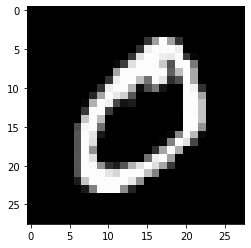

In [ ]:
img = data[0][0][1]
pixels = np.asarray(img)
print(pixels.shape)
plt.imshow(pixels, cmap='gray')

In [ ]:
train_images = data[0][0]/255.0
train_labels = data[0][1]
test_images = data[1][0]/255.0
test_labels = data[1][1]
print(type(train_labels))
print(type(train_labels[0]))
print(test_images.shape)

<class 'numpy.ndarray'>
<class 'numpy.uint8'>
(10000, 28, 28)


In [ ]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
print(test_images[0].shape)

(28, 28, 1)


In [ ]:
#training in LeNet-5

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape=(28,28,1), padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation ='relu', input_shape=(28,28,1), padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer= 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'] )

In [ ]:
model.fit(train_images, train_labels, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 90s 48ms/step - loss: 0.1243 - accuracy: 0.9605
Epoch 2/50
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0460 - accuracy: 0.9859
Epoch 3/50
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0324 - accuracy: 0.9906
Epoch 4/50
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0232 - accuracy: 0.9936
Epoch 5/50
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0205 - accuracy: 0.9943
Epoch 6/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0154 - accuracy: 0.9953
Epoch 7/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0130 - accuracy: 0.9960
Epoch 8/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0116 - accuracy: 0.9969
Epoch 9/50
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 10/50
1875/1875 [==============================] - 88s 47ms/step - lo

In [ ]:
test_loss, test_acc = model.evaluate( test_images, test_labels, verbose=0 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


In [ ]:
print("Accuracy %2f "%test_acc)

Accuracy 0.990100 


In [ ]:
#training in AlexNet
train_images = data[0][0]/255.0
train_labels = data[0][1]
test_images = data[1][0]/255.0
test_labels = data[1][1]
x_train = tf.expand_dims(train_images, axis=3, name=None)
x_test = tf.expand_dims(test_images, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
print(x_train[0].shape)

(28, 28, 3)


In [ ]:

model2 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer= 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'] )

In [ ]:
model2.fit(x_train, train_labels, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 1715s 914ms/step - loss: 0.3006 - accuracy: 0.8995
Epoch 2/50
1875/1875 [==============================] - 1722s 918ms/step - loss: 0.0895 - accuracy: 0.9766
Epoch 3/50
1875/1875 [==============================] - 1731s 923ms/step - loss: 0.0733 - accuracy: 0.9811
Epoch 4/50
1875/1875 [==============================] - 1739s 928ms/step - loss: 0.0561 - accuracy: 0.9858
Epoch 5/50
1875/1875 [==============================] - 1738s 927ms/step - loss: 0.0477 - accuracy: 0.9877
Epoch 6/50
1875/1875 [==============================] - 1748s 932ms/step - loss: 0.0419 - accuracy: 0.9899
Epoch 7/50
1875/1875 [==============================] - 1740s 928ms/step - loss: 0.0387 - accuracy: 0.9905
Epoch 8/50
1875/1875 [==============================] - 1745s 931ms/step - loss: 0.0332 - accuracy: 0.9916
Epoch 9/50
1875/1875 [==============================] - 1732s 924ms/step - loss: 0.0335 - accuracy: 0.9916
Epoch 10/50
1875/1875 [=========================

In [ ]:
test_loss, test_acc = model.evaluate( test_images, test_labels, verbose=0 )
print("Accuracy %2f "%test_acc)